<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.891 · Aprendizaje automático · PEC1</p>
<p style="margin: 0; text-align:right;">2025-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


**PEC 1: Preparación de datos**

El objetivo principal de esta primera PEC es que os familiaricéis con el entorno de trabajo que vais a utilizar en el resto de actividades de la asignatura. Dicho entorno estará formado por un conjunto de dependencias a los módulos de Python necesarios para poder ejecutar de forma correcta el código que resuelve vuestra PEC. Estas dependencias las gestionaremos gracias a la ayuda de Anaconda, que, entre otras cosas, nos provee de un gestor de entornos virtuales para Python.

Otra de las herramientas fundamentales del que será vuestro nuevo entorno de trabajo será Jupyter, que os permitirá trabajar con Notebooks (ficheros \*.ipynb), como el presente enunciado, y donde podréis ejecutar vuestro código celda a celda, mostrando los resultados intermedios que necesitéis para comprender correctamente qué es lo que estáis haciendo en cada momento.

En esta primera PEC, otro de los aspectos imprescindibles que vamos a cubrir, tal y como adelanta su título, es el de la preparación de los datos. En esta PEC aprenderemos a cargar distintos conjuntos de datos o _datasets_, los combinaremos y nos ayudaremos de herramientas de visualización para comprender mejor cómo se distribuye el dato, con el objetivo de entender cómo podemos sacarle partido. Además, nos habituaremos a trabajar con conjuntos de entrenamiento y test para confirmar si las conclusiones que sacamos sobre una parte de las muestras se pueden generalizar y extrapolar al resto.

En resumen, en esta actividad veremos cómo aplicar diferentes técnicas para la carga y preparación de datos siguiendo los pasos listados a continuación:
1. Carga y combinación de los distintos conjuntos de datos (1.5 puntos)<br>
   1.1. Accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona<br>
   1.2. Climatologías diarias (AEMET)<br>
2. Análisis de los datos (3 puntos)<br>
   2.1. Análisis estadístico básico<br>
   2.2. Análisis exploratorio de los datos<br>
3. Preprocesado de los datos (1 punto)<br>
4. Reducción de la dimensionalidad (2 puntos)<br>
5. Conjuntos desbalanceados de datos (1.5 puntos)<br>
6. Búsqueda y combinación de nuevos conjuntos de datos (1 punto)<br>

**Importante:** cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** la solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.

**Importante:** es conveniente que utilicéis una semilla con un valor fijo (en este Notebook se os propone la variable _seed_ inicializada a 100) en todos aquellos métodos o funciones que contengan alguna componente aleatoria para aseguraros de que obtendréis siempre el mismo resultado en las distintas ejecuciones de vuestro código.

**Importante:** no olvidéis poner vuestro nombre y apellidos en la siguiente celda.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: JULIO ÚBEDA QUESADA</strong>
</div>

Para la realización de la actividad necesitaremos importar los siguientes módulos:

In [ ]:
%load_ext autoreload
%autoreload 2

# Proporciona funciones para interactuar con el sistema operativo (como rutas de archivos)
import os  

# Permite modificar aspectos del entorno de ejecución de Python, como la lista de rutas de búsqueda de módulos (sys.path)
import sys 

# En notebooks, usa la ruta del notebook actual
root_dir = os.path.abspath('..')  # Sube un nivel desde /notebooks/
sys.path.append(root_dir)

# Importa las funciones personalizadas desde utils
import utils.tidy_functions as tf

# Importa las bibliotecas necesarias para el análisis de datos y visualización
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Bibliotecas para cálculos numéricos
import numpy as np

# Librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos interactivos
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Mapas interactivos
import folium
from folium.plugins import HeatMap

# Semilla predefinida
seed = 100

# Carga y combinación de los distintos conjuntos de datos (1.5 puntos)

En esta PEC trabajaremos con un conjunto de datos en el que cada muestra representará uno de los accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona. Este conjunto de datos incorpora el número de lesionados segun gravedad, el número de vehículos y el punto de impacto. Por otro lado, queremos enriquecer dicho conjunto de datos añadiéndole nuevos atributos descriptivos y esto lo haremos utilizando un segundo _dataset_, en el que cada muestra será la información climatológica de un día.

Comencemos con la carga de datos:

## Accidentes gestionados por la Guardia Urbana en la ciudad de Barcelona

El primer conjunto de datos, que además es el principal, está disponible dentro del servicio de datos abiertos del Ajuntament de Barcelona: [Open Data BCN](https://opendata-ajuntament.barcelona.cat/es/).

En el enlace <https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents-gu-bcn> tenéis accesible tanto el mencionado _dataset_ (separado por año) como toda la información relevante para comprender mejor con qué tipo de dato vamos a trabajar. Como puede comprobarse en la descripción, tenemos tanto el código de la calle donde ha sucedido el accidente como su nombre, pero no disponemos del tipo de vía donde sucede, algo que podría resultarnos útil. Por este motivo haremos uso de un archivo complementario que encontraremos en el siguiente enlace <https://opendata-ajuntament.barcelona.cat/data/es/dataset/carrerer>.

En el desarrollo de esta PEC y con la intención de ayudar a evitar todo tipo de accidentes, queremos averiguar qué atributos descriptivos nos dan más información acerca de la gravedad del accidente. En el conjunto de datos facilitado esta información viene desglosada en diferentes columnas referentes al número y tipo de víctimas. Para nuestro propósito, vamos a combinar la información que nos dan estas columnas en una única columna que llamaremos "gravedad" y que será nuestra variable objetivo.

En primer lugar, deberéis cargar y procesar en el Notebook los ficheros que conformarán el cuerpo del conjunto de datos con el que trabajaremos durante el resto de la actividad. Para ello podéis descargarlos manualmente de los enlaces referidos previamente o utilizar los ficheros que os facilitamos en el enunciado: "2023_accidents_gu_bcn.csv", "2024_accidents_gu_bcn.csv" y "carrerer.csv".

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> con la ayuda de <i>pandas</i>, cargad por separado los distintos ficheros que conforman el conjunto de datos de accidentes. Para ello:

<ul>
  <li>Concatenad en el mismo <i>DataFrame</i> los accidentes de los años 2023 y 2024.</li>
  <li>Generad una nueva columna llamada "gravedad" que tomará los valores numéricos 3, 2, 1 ó 0 en función de si hay muertos, heridos graves, leves o ningún tipo de víctima respectivamente.</li>
  <li>Incorporad a dicho <i>DataFrame</i> la información del tipo de vía que se encuentra en el callejero utilizando para cruzarla el código de la calle.</li>
  <li>Quedaros con las columnas referentes a la latitud y longitud en sistema WGS84, tipo de vía, día de la semana, fecha y hora, así como con la nueva columna que indicará la gravedad del accidente.</li>
</ul>

Posteriormente, mostrad:

<ul>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").</li>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.</li>
</ul>

</div>

---

## 1. Cargar, combinar y preparar los datos de accidentes de tráfico

En este fragmento de código **cargo, combino y preparo los datos de accidentes de tráfico** registrados en la ciudad de Barcelona durante los años **2023 y 2024**.

Primero, **leo por separado** varios archivos CSV que contienen información tanto de los accidentes como de las calles, cuyas rutas están definidas en la lista `rutas_csv`. Para cada archivo, **creo un DataFrame de pandas**, lo guardo en un diccionario (`dataframes`) y muestro por pantalla un resumen con el número de filas y columnas cargadas.

Después, **concateno los DataFrames correspondientes a los años 2023 y 2024** en un único conjunto de datos llamado `accidentes`, de manera que unifico toda la información disponible en un solo DataFrame. Finalmente, **muestro el número total de registros combinados y la lista de columnas** que contiene el conjunto resultante.

En resumen, este bloque de código representa la **fase inicial de integración y exploración de los datos de accidentes**, dejando preparado el conjunto completo para su posterior análisis.


In [2]:
# --- 1. Cargad por separado los distintos ficheros que conforman el conjunto de datos de accidentes ---
# -- Concatenad en el mismo DataFrame los accidentes de los años 2023 y 2024.

# Lista de rutas a los archivos CSV con los accidentes de los años 2023 y 2024
rutas_csv = [
    r"..\Data\2023_accidents_gu_bcn.csv",
    r"..\Data\2024_accidents_gu_bcn.csv",
    r"..\Data\carrerer.csv"
]

# Diccionario donde se guardarán los DataFrames
dataframes = {}

for ruta in rutas_csv:
    try:
        # Leer CSV con separador coma y encabezado
        df = pd.read_csv(ruta, sep=",", encoding="utf-8")

        # Obtener nombre de archivo sin extensión
        nombre_archivo = os.path.splitext(os.path.basename(ruta))[0]

        # Guardar en el diccionario
        dataframes[nombre_archivo] = df

        print(f"Cargado: {nombre_archivo} ({len(df)} filas, {len(df.columns)} columnas)")

    except Exception as e:
        print(f"Error al leer {ruta}: {e}")

# --- 2. Concatenar los accidentes de 2023 y 2024 ---
acc_2023 = dataframes['2023_accidents_gu_bcn']
acc_2024 = dataframes['2024_accidents_gu_bcn']

accidentes = pd.concat([acc_2023, acc_2024], ignore_index=True)

print(f"Accidentes totales: {len(accidentes)} filas, {len(accidentes.columns)} columnas)")

print(f"\nEl dataframe accidentes concatenado contiene las siguientes columnas:\n{accidentes.columns.tolist()}")

Cargado: 2023_accidents_gu_bcn (7724 filas, 25 columnas)
Cargado: 2024_accidents_gu_bcn (7536 filas, 25 columnas)
Cargado: carrerer (4767 filas, 7 columnas)
Accidentes totales: 15260 filas, 25 columnas)

El dataframe accidentes concatenado contiene las siguientes columnas:
['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'Coordenada_UTM_Y_ED50', 'Coordenada_UTM_X_ED50', 'Longitud_WGS84', 'Latitud_WGS84']


### 1.1. Funciones auxiliares

Voy a crear estas dos funciones para utilizarlas a lo largo de la práctica y facilitar el análisis exploratorio de los datos.

La primera, **`describe_df()`**, genera un resumen completo del DataFrame, mostrando su forma, tipos de datos, valores nulos, número de valores únicos y estadísticas básicas para las columnas numéricas, además del rango de fechas para las columnas de tipo datetime.

La segunda, **`null_summary()`**, ofrece un resumen centrado únicamente en las columnas que contienen valores nulos, indicando cuántos son, su porcentaje respecto al total y el tipo de dato correspondiente.

La tercera, **`detect_duplicates()`**, permite detectar registros duplicados dentro del DataFrame, devolviendo un nuevo DataFrame con las filas repetidas. Esto me ayudará a identificar posibles errores o redundancias en los datos originales.

La cuarta, **`unique_df()`**, ofrece un resumen de los valores únicos en las columnas categóricas o de texto, mostrando todas las categorías presentes en cada variable. Es útil para comprender la diversidad de valores y detectar posibles inconsistencias en la codificación o escritura de las categorías.

Estas cuatro funciones, me permitirán **evaluar rápidamente la calidad y estructura de los datos** antes de realizar análisis más detallados.


In [ ]:
def describe_df(data): 
    """
    Proporciona un resumen del DataFrame, incluyendo forma, tipos de datos, estadísticas básicas,
    conteo de valores nulos, valores únicos, mediana y rango de fechas para columnas tipo datetime.

    :param data: DataFrame de pandas.
    :return: DataFrame con el resumen del DataFrame dado.
    """
    # Crear base del resumen
    total = len(data)
    summary = pd.DataFrame({
        'Column': data.columns,
        'Data Type': data.dtypes.astype(str),
        'Non-null Count': data.count().values,
        '% Null Values': ((data.isnull().sum() / total) * 100).round(2).values,
        'Unique Values': data.nunique().values
    })

    summary['Shape'] = f"{data.shape[0]} rows, {data.shape[1]} columns"

    # Estadísticas para columnas numéricas
    numeric_cols = data.select_dtypes(include=['number']).columns
    if not numeric_cols.empty:
        describe_stats = data[numeric_cols].describe().T
        describe_stats = describe_stats.rename(columns={'50%': 'median'})[
            ['mean', 'median', 'std', 'min', '25%',  '75%', 'max']
        ]
        describe_stats.reset_index(inplace=True)
        describe_stats.rename(columns={'index': 'Column'}, inplace=True)

        summary = pd.merge(summary, describe_stats, on='Column', how='left')

    # Rango de fechas para columnas datetime
    datetime_cols = data.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
    if not datetime_cols.empty:
        date_ranges = pd.DataFrame({
            'Column': datetime_cols,
            'Min Date': data[datetime_cols].min().values,
            'Max Date': data[datetime_cols].max().values
        })
        summary = pd.merge(summary, date_ranges, on='Column', how='left')

    return summary

def null_summary(data): 
    """
    Devuelve un resumen de las columnas del DataFrame que contienen valores nulos.
    Incluye: Column, Non-null Count, Null Count, % Null Values y TotalCount.

    :param data: DataFrame de pandas.
    :return: DataFrame con el resumen de las columnas del DataFrame que contienen valores nulos.
    """
    total = len(data)
    summary = pd.DataFrame({
        'Column': data.columns,
        'Data Type': data.dtypes.astype(str),
        'Non-null Count': data.count().values,
        'Null Count': data.isnull().sum().values,
        '% Null Values': ((data.isnull().sum() / total) * 100).round(2).values,
        'TotalCount': total
    })
    
    # 🔹 Filtrar y ordenar solo columnas con valores nulos
    summary = summary[summary['Null Count'] > 0]
    summary = summary.sort_values(by='% Null Values', ascending=False).reset_index(drop=True)

    
    return summary

def unique_df(df):
    """
    Imprime un resumen de las categorías únicas para las variables categóricas de un DataFrame.

    :param df: DataFrame de pandas.
    """
    categorical_columns = df.select_dtypes(include=['category', 'object']).columns

    if len(categorical_columns) == 0:
        print("No se encontraron columnas categóricas u objeto en el DataFrame.")
        return

    for column in categorical_columns:
        print(f"Resumen para la columna '{column}':\n{df[column].unique()}\n")

### 1.2. Descripcion del dataset

#### 1. Dimensiones y tipo de datos

* El dataset tiene **15,260 filas** y **25 columnas**.
* Combina **variables numéricas** (`int64`, `float64`) y **categóricas/texto** (`object`).
* Algunas columnas representan **identificadores o códigos** (`Numero_expedient`, `Codi_districte`, `Codi_barri`, `Codi_carrer`), otras son **descriptivas** (`Nom_districte`, `Nom_barri`, `Nom_carrer`), y otras son **información temporal** (`NK_Any`, `Mes_any`, `Dia_mes`, `Hora_dia`).

#### 2. Valores nulos

* Algunas columnas presentan **alto porcentaje de valores nulos**:

  * `Descripcio_causa_vianant`: 46% nulos
  * `Numero_morts`: 49% nulos
  * `Numero_lesionats_greus`: 48% nulos
* Otras columnas están completas (0% nulos), especialmente códigos, nombres y coordenadas.
* `Num_postal` tiene ~20% de nulos, lo que podría complicar análisis geográficos más detallados.

#### 3. Distribución de valores y cardinalidad

* Códigos y nombres:
  * `Codi_districte` tiene 11 valores únicos, `Codi_barri` 74, `Codi_carrer` 1420, `Nom_carrer` 3720.
  * Esto refleja un dataset **geográficamente detallado**, con jerarquía distrito → barrio → calle.
  
* Fechas y horas:
  * Abarca los años 2023 y 2024, todos los meses, días y horas del día.

* Variables de víctimas:
  * `Numero_morts` y `Numero_lesionats_greus` tienen media cercana a 0 y mediana 0 → la mayoría de incidentes no causan muertos ni lesiones graves.
  * `Numero_lesionats_lleus` y `Numero_victimes` muestran una distribución más relevante (media ~1.2), con algunos casos extremos (hasta 25–26).
  
* Vehículos implicados: la mayoría de accidentes involucran 1 o 2 vehículos, aunque hay algunos hasta 18.

#### 4. Información geográfica

* Contiene **coordenadas UTM y WGS84**, útiles para mapas y análisis espacial.
* Las coordenadas WGS84 muestran **consistencia**, con valores estrechamente concentrados, lo que indica que los accidentes ocurren en una **zona geográfica relativamente delimitada**.

#### 5. Observaciones generales

* Dataset **principalmente urbano**, con información detallada de ubicación y tiempo de incidentes.
* Las columnas de descripción de causas o víctimas tienen **muchos valores nulos**, lo que sugiere que se debe tener cuidado en análisis de seguridad o siniestros graves.
* Variables categóricas con pocas categorías (`Descripcio_dia_setmana`, `Descripcio_torn`) son ideales para **agrupamientos o análisis de patrones temporales**.

> **El valor '-1' en una celda indica que no se dispone del dato**

In [4]:
describe_df(accidentes)

,Column,Data Type,Non-null Count,% Null Values,Unique Values,Shape,mean,median,std,min,25%,75%,max
0,Numero_expedient,object,15260,0.00,15257,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Codi_districte,int64,15260,0.00,11,"15260 rows, 25 columns",4.95,4.00,3.01,-1.00,2.00,8.00,10.00
2,Nom_districte,object,15260,0.00,11,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Codi_barri,int64,15260,0.00,74,"15260 rows, 25 columns",27.83,21.00,22.09,-1.00,8.00,44.00,73.00
4,Nom_barri,object,15260,0.00,75,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Codi_carrer,int64,15260,0.00,1420,"15260 rows, 25 columns",258912.50,197302.00,207552.48,-1.00,120807.00,332854.50,701918.00
6,Nom_carrer,object,15260,0.00,3720,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Num_postal,object,12145,20.41,3314,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Descripcio_dia_setmana,object,15260,0.00,7,"15260 rows, 25 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NK_Any,int64,15260,0.00,2,"15260 rows, 25 columns",2023.49,2023.00,0.50,2023.00,2023.00,2024.00,2024.00


### 1.3. Renombre de variables y categorias: catalán -> castellano

He renombrado las columnas del catalán al castellano para **facilitar la comprensión y el manejo del conjunto de datos** durante el análisis. De este modo, las variables resultan **más intuitivas y coherentes** con el resto del informe, que está redactado en castellano. 


In [5]:
# Diccionario de traducción: catalán -> castellano
traduccion_columnas = {
    'Numero_expedient': 'Numero_expediente',
    'Codi_districte': 'Codigo_distrito',
    'Nom_districte': 'Nombre_distrito',
    'Codi_barri': 'Codigo_barrio',
    'Nom_barri': 'Nombre_barrio',
    'Codi_carrer': 'Codigo_calle',
    'Nom_carrer': 'Nombre_calle',
    'Num_postal ': 'Numero_postal',  # nota el espacio final en tu lista
    'Descripcio_dia_setmana': 'Nombre_dia_semana',
    'NK_Any': 'Ano',
    'Mes_any': 'Mes_ano',
    'Nom_mes': 'Nombre_mes',
    'Dia_mes': 'Dia_mes',
    'Hora_dia': 'Hora_dia',
    'Descripcio_torn': 'Tipo_turno',
    'Descripcio_causa_vianant': 'Causalidad_accidente',
    'Numero_morts': 'Numero_muertos',
    'Numero_lesionats_lleus': 'Numero_lesionados_leves',
    'Numero_lesionats_greus': 'Numero_lesionados_graves',
    'Numero_victimes': 'Numero_victimas',
    'Numero_vehicles_implicats': 'Numero_vehiculos_implicados',
    'Coordenada_UTM_Y_ED50': 'Coordenada_UTM_Y_ED50',
    'Coordenada_UTM_X_ED50': 'Coordenada_UTM_X_ED50',
    'Longitud_WGS84': 'Longitud_WGS84',
    'Latitud_WGS84': 'Latitud_WGS84'
}

# Renombrar columnas
accidentes_es = accidentes.rename(columns=traduccion_columnas).copy()

# Comprobar el resultado
cols = accidentes_es.columns.tolist()
for i in range(0, len(cols), 5):
    print(cols[i:i+5])

['Numero_expediente', 'Codigo_distrito', 'Nombre_distrito', 'Codigo_barrio', 'Nombre_barrio']
['Codigo_calle', 'Nombre_calle', 'Numero_postal', 'Nombre_dia_semana', 'Ano']
['Mes_ano', 'Nombre_mes', 'Dia_mes', 'Hora_dia', 'Tipo_turno']
['Causalidad_accidente', 'Numero_muertos', 'Numero_lesionados_leves', 'Numero_lesionados_graves', 'Numero_victimas']
['Numero_vehiculos_implicados', 'Coordenada_UTM_Y_ED50', 'Coordenada_UTM_X_ED50', 'Longitud_WGS84', 'Latitud_WGS84']


- Revision de las categorias dentro de las columnas categóricas:

In [6]:
unique_df(accidentes_es)

Resumen para la columna 'Numero_expediente':
['2023S000001    ' '2023S000002    ' '2023S000003    ' ... '2024S007549'
 '2024S007550' '2024S007551']

Resumen para la columna 'Nombre_distrito':
['Sants-Montjuïc' 'Horta-Guinardó' 'Ciutat Vella' 'Gràcia'
 'Sarrià-Sant Gervasi' 'Sant Martí' 'Sant Andreu' 'Les Corts' 'Eixample'
 'Nou Barris' 'Desconegut']

Resumen para la columna 'Nombre_barrio':
['Sants' 'el Baix Guinardó' 'el Raval' 'la Vila de Gràcia'
 'la Marina del Prat Vermell' 'Horta' 'Sant Gervasi - Galvany'
 'Sant Genís dels Agudells' 'Provençals del Poblenou' 'el Poblenou'
 "el Camp de l'Arpa del Clot" 'la Trinitat Vella' 'Pedralbes'
 'Sant Martí de Provençals' 'Vallvidrera, el Tibidabo i les Planes'
 'el Putxet i el Farró' "la Dreta de l'Eixample" 'el Fort Pienc'
 'la Trinitat Nova' "el Camp d'en Grassot i Gràcia Nova"
 "la Nova Esquerra de l'Eixample" 'el Coll' 'la Sagrada Família'
 "l'Antiga Esquerra de l'Eixample" 'el Poble-sec'
 'Diagonal Mar i el Front Marítim del Poblenou'
 

Adicionalmente, he decidido traducir solo las categorías de estas cuatro columnas porque sus valores descriptivos están en catalán y se utilizan directamente en la interpretación de resultados, gráficos y tablas.

El resto de variables (como barrios, distritos o calles) se mantienen en su idioma original porque:

- Son nombres propios oficiales del municipio de Barcelona.
- Traducirlos podría alterar su identificación geográfica o causar ambigüedades.

Así, garantizo que las categorías interpretativas sean claras para el lector hispanohablante, mientras conservo la fidelidad y precisión en los nombres oficiales de localización.

In [7]:
# --- Traducción de categorías del catalán al castellano ---
trad_dia_semana = {
    'Dilluns': 'Lunes',
    'Dimarts': 'Martes',
    'Dimecres': 'Miércoles',
    'Dijous': 'Jueves',
    'Divendres': 'Viernes',
    'Dissabte': 'Sábado',
    'Diumenge': 'Domingo'
}

trad_mes = {
    'Gener': 'Enero',
    'Febrer': 'Febrero',
    'Març': 'Marzo',
    'Abril': 'Abril',
    'Maig': 'Mayo',
    'Juny': 'Junio',
    'Juliol': 'Julio',
    'Agost': 'Agosto',
    'Setembre': 'Septiembre',
    'Octubre': 'Octubre',
    'Novembre': 'Noviembre',
    'Desembre': 'Diciembre'
}

trad_turno = {
    'Matí': 'Mañana',
    'Tarda': 'Tarde',
    'Nit': 'Noche'
}

trad_causalidad = {
    'No és causa del  vianant': 'No es causa del peatón',
    'Creuar per fora pas de vianants': 'Cruzar fuera del paso de peatones',
    'Altres': 'Otros',
    'Desobeir el senyal del semàfor': 'Desobedecer la señal del semáforo',
    'Transitar a peu per la calçada': 'Transitar a pie por la calzada',
    'Desobeir altres senyals': 'Desobedecer otras señales'
}

# Aplicar la traducción a cada columna relevante
accidentes_es['Nombre_dia_semana'] = accidentes_es['Nombre_dia_semana'].replace(trad_dia_semana)
accidentes_es['Nombre_mes'] = accidentes_es['Nombre_mes'].replace(trad_mes)
accidentes_es['Tipo_turno'] = accidentes_es['Tipo_turno'].replace(trad_turno)
accidentes_es['Causalidad_accidente'] = accidentes_es['Causalidad_accidente'].replace(trad_causalidad)

# Comprobación rápida del resultado
print("Categorías traducidas correctamente:\n")
print("-> Nombre_dia_semana:", accidentes_es['Nombre_dia_semana'].unique())
print("-> Nombre_mes:", accidentes_es['Nombre_mes'].unique())
print("-> Tipo_turno:", accidentes_es['Tipo_turno'].unique())
print("-> Causalidad_accidente:", accidentes_es['Causalidad_accidente'].dropna().unique())

Categorías traducidas correctamente:

-> Nombre_dia_semana: ['Domingo' 'Lunes' 'Miércoles' 'Martes' 'Jueves' 'Viernes' 'Sábado']
-> Nombre_mes: ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Julio' 'Junio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
-> Tipo_turno: ['Mañana' 'Noche' 'Tarde']
-> Causalidad_accidente: ['No es causa del peatón' 'Cruzar fuera del paso de peatones' 'Otros'
 'Desobedecer la señal del semáforo' 'Transitar a pie por la calzada'
 'Desobedecer otras señales']


### 1.4. Creación de la columna **`gravedad`** según muertos / heridos / graves / no victimas

En este bloque de código creo una nueva columna llamada **`gravedad`** que resume la severidad de los accidentes en un único indicador numérico.

La columna toma los valores:

* **3** si hay muertos,
* **2** si hay heridos graves,
* **1** si hay heridos leves,
* **0** si no hay víctimas.

Esta variable servirá como **variable objetivo** en futuros modelos de clasificación, permitiendo predecir la gravedad de un accidente en función de sus características. 


In [8]:
# --- 3. Crear la columna 'gravedad' según muertos / heridos / graves / no victimas ---
# -- Generad una nueva columna llamada "gravedad" que tomará los valores numéricos 3, 2, 1 ó 0 en función de si hay muertos, heridos graves, leves o ningún tipo de víctima respectivamente.
# Si hay muertos => 3
# Si hay heridos graves => 2
# Si hay heridos leves => 1
# Si no hay víctimas => 0

accidentes_es["gravedad"] = 0
accidentes_es.loc[accidentes_es["Numero_lesionados_leves"] > 0, "gravedad"] = 1
accidentes_es.loc[accidentes_es["Numero_lesionados_graves"] > 0, "gravedad"] = 2
accidentes_es.loc[accidentes_es["Numero_muertos"] > 0, "gravedad"] = 3

# Mostrar algunas filas para inspección visual
print(accidentes_es[["Numero_muertos", "Numero_lesionados_graves", "Numero_lesionados_leves", "gravedad"]].head(10))

   Numero_muertos  Numero_lesionados_graves  Numero_lesionados_leves  gravedad
0            0.00                      1.00                     0.00         2
1            0.00                      0.00                     0.00         0
2            0.00                      0.00                     1.00         1
3            0.00                      0.00                     1.00         1
4            0.00                      0.00                     1.00         1
5            0.00                      0.00                     1.00         1
6            0.00                      0.00                     1.00         1
7            0.00                      0.00                     4.00         1
8            0.00                      0.00                     1.00         1
9            0.00                      0.00                     3.00         1


**Con esto:**
- La columna 'gravedad' siempre toma la gravedad máxima presente: muertos > graves > leves > ninguna víctima.  
- En caso de no conocer alguna de las columnas implicadas en la creación de la variable objetivo, esta toma el valor 0.

### 1.5. Incorporación de información sobre las calles

En esta sección incorporo al DataFrame de accidentes **información adicional del callejero**, específicamente el **tipo de vía**, que se obtiene cruzando el código de calle de cada accidente con el código correspondiente en el callejero.

Primero, traduzco las columnas del callejero del catalán al castellano para m**antener la coherencia con el resto del dataset**. A continuación, realizo un **merge** entre el DataFrame de accidentes y el callejero, agregando la columna `Tipo_via` a cada registro de accidente.

Esta incorporación permite **enriquecer el conjunto de datos con información vial**, lo que será útil para análisis posteriores y para modelos de clasificación donde se considerará la influencia del tipo de vía en la gravedad de los accidentes. 

In [9]:
# --- 4. Incorporar el tipo de vía a través del código de calle ---
# -- Incorporad a dicho DataFrame la información del tipo de vía que se encuentra en el callejero utilizando para cruzarla el código de la calle.
callejero = dataframes['carrerer']  

# Diccionario de traducción: catalán -> castellano 
traduccion_columnas = {
    'codi_via': 'Codigo_via',
    'codi_carrer_ine': 'Codigo_distrito',
    'tipus_via': 'Tipo_via',
    'nom_curt': 'Codigo_barrio',
    'nom_oficial': 'Nombre_barrio',
    'nre_min': 'Numero_min',
    'nre_max': 'Numero_max'
}

# Ejemplo de uso con pandas
callejero_es = callejero.rename(columns=traduccion_columnas).copy()

# Comprobar el resultado
print(f"\nEl dataframe carrerer contiene las siguientes columnas:\n{callejero_es.columns.tolist()}")

# Unir accidentes_es con callejero_es 
accidentes_carrerer = accidentes_es.merge(
    callejero_es[["Codigo_via", "Tipo_via"]],
    left_on="Codigo_calle",   # columna del dataframe accidentes_es
    right_on="Codigo_via",    # columna del dataframe callejero_es
    how="left"
)

# Comprobar el resultado
print(f"\nEl dataframe accidentes vinculado a carrerer contiene las siguientes columnas:\n{accidentes_es.columns.tolist()}\n y {len(accidentes_es)} filas, {len(accidentes_es.columns)} columnas)")


El dataframe carrerer contiene las siguientes columnas:
['Codigo_via', 'Codigo_distrito', 'Tipo_via', 'Codigo_barrio', 'Nombre_barrio', 'Numero_min', 'Numero_max']

El dataframe accidentes vinculado a carrerer contiene las siguientes columnas:
['Numero_expediente', 'Codigo_distrito', 'Nombre_distrito', 'Codigo_barrio', 'Nombre_barrio', 'Codigo_calle', 'Nombre_calle', 'Numero_postal', 'Nombre_dia_semana', 'Ano', 'Mes_ano', 'Nombre_mes', 'Dia_mes', 'Hora_dia', 'Tipo_turno', 'Causalidad_accidente', 'Numero_muertos', 'Numero_lesionados_leves', 'Numero_lesionados_graves', 'Numero_victimas', 'Numero_vehiculos_implicados', 'Coordenada_UTM_Y_ED50', 'Coordenada_UTM_X_ED50', 'Longitud_WGS84', 'Latitud_WGS84', 'gravedad']
 y 15260 filas, 26 columnas)


### 1.6. Selección de columnas relevantes

En este paso **reducimos el DataFrame a las columnas más relevantes** para el análisis y los futuros modelos de clasificación.
He seleccionado únicamente:

- **Coordenadas geográficas** (`Latitud_WGS84`, `Longitud_WGS84`) para ubicar los accidentes.
- **Tipo de vía** (`Tipo_via`) para incorporar características del entorno.
- **Información temporal** (`Nombre_dia_semana`, `Dia_mes`, `Mes_ano`, `Ano`, `Hora_dia`) para capturar patrones según día, hora o mes.
- **Gravedad del accidente** (`gravedad`) que servirá como variable objetivo en modelos de predicción.

Esta selección permite trabajar con un **conjunto de datos compacto y enfocado**, eliminando columnas redundantes o irrelevantes y facilitando análisis y modelado posteriores.

In [10]:
# --- 5. Seleccionar solo las columnas relevantes ---
# -- Quedaros con las columnas referentes a la latitud y longitud en sistema WGS84, tipo de vía, día de la semana, fecha y hora, así como con la nueva columna que indicará la gravedad del accidente.
columnas_finales = [
    "Latitud_WGS84",
    "Longitud_WGS84",
    "Tipo_via",
    "Nombre_dia_semana",
    "Dia_mes",
    "Mes_ano",
    "Ano",
    "Hora_dia",
    "gravedad"
]

accidentes_ex1 = accidentes_carrerer[columnas_finales].copy()
accidentes_ex1.head(5)

,Latitud_WGS84,Longitud_WGS84,Tipo_via,Nombre_dia_semana,Dia_mes,Mes_ano,Ano,Hora_dia,gravedad
0,41.37,2.13,Rbla,Domingo,1,1,2023,10,2
1,41.41,2.17,C,Domingo,1,1,2023,3,0
2,41.38,2.17,C,Domingo,1,1,2023,3,1
3,41.40,2.16,C,Domingo,1,1,2023,17,1
4,41.40,2.16,C,Domingo,1,1,2023,17,1


### 1.7. Resumen del apartado 1 del informe

#### 1.7.1. Número y nombre de los atributos descriptivos

El conjunto de datos final cuenta con **8 variables descriptivas** que se utilizarán como atributos de entrada para predecir la gravedad de los accidentes. Estas variables incluyen información geográfica (`Latitud_WGS84`, `Longitud_WGS84`), características de la vía (`Tipo_via`) y datos temporales (`Nombre_dia_semana`, `Dia_mes`, `Mes_ano`, `Ano`, `Hora_dia`).

In [11]:
# --- 6. Variables descriptivas y número de muestras ---
# -- El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").
variables_descriptivas = accidentes_ex1.columns.drop("gravedad")
n_variables = len(variables_descriptivas)
n_muestras = len(accidentes_ex1)

print(f"Número de variables descriptivas: {n_variables}")
print("\t-> Variables:", list(variables_descriptivas))

Número de variables descriptivas: 8
	-> Variables: ['Latitud_WGS84', 'Longitud_WGS84', 'Tipo_via', 'Nombre_dia_semana', 'Dia_mes', 'Mes_ano', 'Ano', 'Hora_dia']


#### 1.7.2. Número de filas (muestras) del conjunto de datos

El dataset contiene un total de 15.260 registros, lo que representa la cantidad de accidentes disponibles tras la limpieza y selección de columnas relevantes.

In [12]:
# --- 6. El número de filas (muestras) del conjunto de datos.
print(f"Número de filas (muestras) del conjunto de datos: {n_muestras}")

Número de filas (muestras) del conjunto de datos: 15260


#### 1.7.3. Verficiacion e imputacion de *missing values*

Los 99 casos sin valor corresponden a códigos de calle ausentes o inválidos en el dataset *carrerer*.

-  Justificación de las imputaciones:

| Columna        | % Nulos | Justificación                                                                                                                                                                                                                     | Valor imputado  |
| -------------- | ------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------- |
| **`Tipo_via`** | 0.14%   |  Como no es posible recuperar el dato, se asigna `"Desconocido"` para mantener consistencia y evitar errores en el análisis. | `"Desconocido"` |



In [13]:
# --- 7. Comprobación de valores faltantes ---
# -- Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.

null_summary(accidentes_ex1)

,Column,Data Type,Non-null Count,Null Count,% Null Values,TotalCount
0,Tipo_via,object,15161,99,0.65,15260


In [14]:
# IMPUTACIÓN DE VALORES NULOS

# Imputar con un valor genérico como "Desconocido"
accidentes_ex1.loc[:, "Tipo_via"] = accidentes_ex1["Tipo_via"].fillna("Desconocido")

null_summary(accidentes_ex1)

,Column,Data Type,Non-null Count,Null Count,% Null Values,TotalCount


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿el conjunto de datos propuesto es un problema de aprendizaje automático supervisado o no?, en el caso de serlo, ¿de qué tipo de aprendizaje supervisado estaríamos hablando?

### Respuesta a la pregunta del apartado 1.

El conjunto de datos preparado corresponde a un problema de **aprendizaje supervisado**, ya que contamos con una variable objetivo claramente definida, que en este caso es la columna `gravedad`. Esta variable indica la severidad del accidente en una escala de 0 a 3, y es precisamente lo que se quiere predecir a partir de las demás columnas del dataset, que actuarían como variables predictoras. Entre estas variables se incluyen la ubicación del accidente (`Latitud_WGS84` y `Longitud_WGS84`), el tipo de vía, el año, el mes, el día y descripcion del dia de la semana y la hora del accidente.

Dado que la variable objetivo es discreta y no continua, estamos ante un problema de **clasificación** en lugar de regresión. Además, como `gravedad` puede tomar más de dos valores posibles (0, 1, 2 o 3), este problema es específicamente una **clasificación multiclase**. Esto significa que el modelo de aprendizaje automático deberá aprender a asignar cada accidente a una de estas cuatro categorías de gravedad basándose en los atributos disponibles.

---

## Climatologías diarias (AEMET)

El segundo conjunto de datos complementa al conjunto de datos inicial con la información de las condiciones meteorológicas de cada día.

La combinación de ambos conjuntos de datos la haremos mediante su fecha. En nuestro caso, partiendo de la premisa de que condiciones meteorológicas menos favorables pueden conducir a un mayor riesgo de accidentes esperamos enriquecer el conjunto de datos original con información muy valiosa.

El conjunto de datos se ha obtenido del siguiente enlace: <https://opendata.aemet.es/centrodedescargas/productosAEMET?>, aunque os lo facilitamos junto al enunciado en el fichero "opendata_aemet_es.csv".

NOTA: como podréis comprobar más adelante, existen muchísimos días donde no hay precipitaciones y otros tantos donde las precipitaciones varían en cantidad, dificultando el análisis de dicha variable y no quedando claro si cuando llueve suceden más accidentes de un tipo o de otro. Es por esto que os pediremos que generéis una nueva columna en función de las precipitaciones en la que reduciréis su dominio continuo a un pequeño número de categorías.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> complementa la información del conjunto de datos de accidentes cargado en la sección anterior con el nuevo conjunto de datos:

<ul>
  <li>Cargad el conjunto de datos con las condiciones meteorológicas con la ayuda de <i>pandas</i>.</li>
  <li>Estudiad la distribución de la columna "prec" y decidid algún criterio mediante el cual podáis categorizarla en un reducido número de opciones.</li>
  <li>Incorporad al conjunto de datos de accidentes que habéis preparado en la sección anterior la información metereológica relevante cruzándola a través de la fecha.</li>
</ul>

NOTA: el nuevo conjunto de datos complementario no dispone de información meteorológica para todos los días de 2023, quedaos sólo con las muestras de accidentes que estén dentro del rango de fechas cubierto por este último _dataset_.

NOTA: podéis eliminar el año del conjunto de datos una vez lo hayáis utilizado para cruzar los accidentes con las condiciones meteorológicas.

Posteriormente, mostrad:

<ul>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").</li>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.</li>
</ul>

Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo), aunque quizá pueda seros de utilidad en algún punto tenerlos también en un único DataFrame combinados.

</div>

## 2. Cargar y breve descripcion del conjunto de datos con las condiciones meteorológicas

Comenzamos cargando el **conjunto de datos de la AEMET** que contiene información sobre las condiciones meteorológicas diarias, utilizando `pandas`. La columna `fecha` se ha convertido a tipo `datetime` para facilitar análisis temporales.

El dataset contiene **606 registros y 20 columnas**, incluyendo variables como temperatura media (`tmed`), mínima (`tmin`) y máxima (`tmax`), precipitación (`prec`), dirección y velocidad del viento (`dir`, `velmedia`, `racha`), humedad relativa (`hrMedia`, `hrMax`, `hrMin`) y horas asociadas a ciertos valores extremos.

La inspección inicial mediante `describe_df()` indica que:

* La mayoría de las variables están completas, con muy pocos valores nulos.
* Algunas columnas contienen información horaria (`horatmin`, `horatmax`, `horaracha`, `horaHrMax`, `horaHrMin`) que podría requerir procesamiento adicional.
* Existen columnas categóricas como `indicativo`, `nombre` y `provincia` que identifican la estación meteorológica y su ubicación.
* El rango de fechas incluye un periodo temporal menor al dataset de accidentes, comenzando el 2023-05-06.

In [15]:
# --- 1. Cargad el conjunto de datos con las condiciones meteorológicas con la ayuda de pandas
ruta_aemet = r"..\Data\opendata_aemet_es.csv"
aemet = pd.read_csv(ruta_aemet, decimal=',', sep=",", encoding="utf-8")

# Convertir la columna de fecha a datetime
aemet['fecha'] = pd.to_datetime(aemet['fecha'], format='%Y-%m-%d', errors='coerce')

describe_df(aemet)

,Column,Data Type,Non-null Count,% Null Values,Unique Values,Shape,mean,median,std,min,25%,75%,max,Min Date,Max Date
0,fecha,datetime64[ns],606,0.00,606,"606 rows, 20 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-06,2024-12-31
1,indicativo,object,606,0.00,1,"606 rows, 20 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,nombre,object,606,0.00,1,"606 rows, 20 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,provincia,object,606,0.00,1,"606 rows, 20 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,altitud,int64,606,0.00,1,"606 rows, 20 columns",26.00,26.00,0.00,26.00,26.00,26.00,26.00,NaT,NaT
5,tmed,float64,606,0.00,181,"606 rows, 20 columns",19.17,19.20,5.26,7.50,14.60,23.70,30.40,NaT,NaT
6,prec,float64,605,0.17,75,"606 rows, 20 columns",1.53,0.00,5.83,0.00,0.00,0.00,55.90,NaT,NaT
7,tmin,float64,606,0.00,201,"606 rows, 20 columns",16.12,16.15,5.61,3.90,11.40,20.90,27.20,NaT,NaT
8,horatmin,object,604,0.33,88,"606 rows, 20 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
9,tmax,float64,606,0.00,185,"606 rows, 20 columns",22.22,22.00,5.06,10.10,17.80,26.50,35.20,NaT,NaT


### 2.1. Análisis de la distribución de la precipitación diaria **`prec`**

Observando la tabla descriptiva de la variable prec (precipitación diaria en mm), vemos que la mediana es 0.00 mm, lo que indica que la mayoría de los días no llueve. Sin embargo, el valor máximo es 55.9 mm, mostrando que, aunque poco frecuentes, existen episodios de lluvia intensa.

Para analizar más a fondo la distribución, calculamos los percentiles más relevantes:

In [16]:
# Definimos los percentiles que queremos observar
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
prec_percentiles = aemet['prec'].quantile(percentiles)
print("Percentiles de precipitación (mm):\n", prec_percentiles)

Percentiles de precipitación (mm):
 0.25    0.00
0.50    0.00
0.75    0.00
0.90    2.36
0.95    8.58
0.99   32.67
Name: prec, dtype: float64


Observamos que:

- El 90 % de los días tiene menos de 2.36 mm de lluvia.
- El 95 % de los días tiene menos de 8.58 mm de lluvia.
- El 99 % de los días tiene menos de 32.67 mm de lluvia.

Para visualizar la distribución y los quartiles, usamos un histograma con líneas verticales en cada percentil:

Gráfico guardado como 'distribucion_precipitacion_seaborn.png'


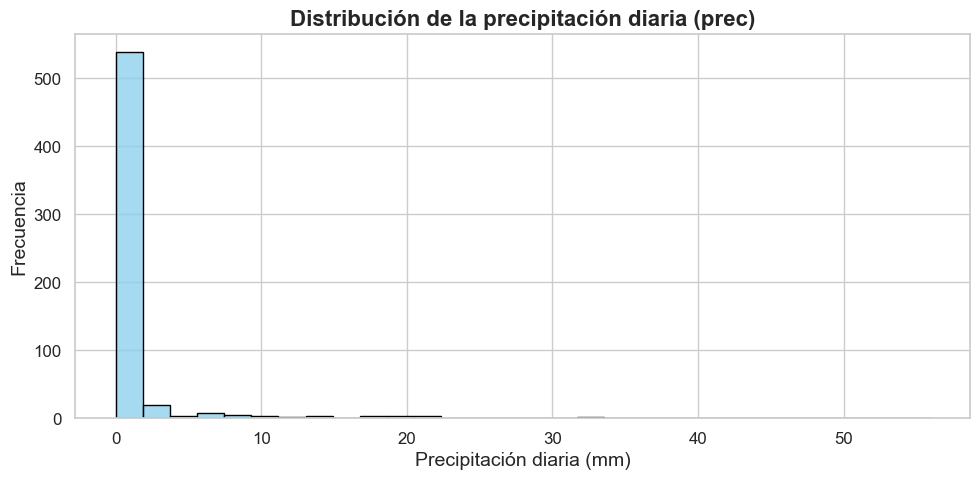

In [17]:
# Configuración estética de Seaborn
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# Crear figura
plt.figure(figsize=(10,5))

# Histograma con Seaborn
sns.histplot(aemet['prec'].dropna(), bins=30, color="skyblue", edgecolor="black") # type: ignore

# Títulos y etiquetas
plt.title("Distribución de la precipitación diaria (prec)", fontsize=16, fontweight='bold')
plt.xlabel("Precipitación diaria (mm)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Guardar el gráfico
plt.savefig(r"../Imagenes/distribucion_precipitacion_seaborn.png", dpi=300)
print("Gráfico guardado como 'distribucion_precipitacion_seaborn.png'")

# Mostrar gráfico
plt.show()


En el gráfico se observa claramente:

- Una barra muy alta en 0 mm, confirmando que la mayoría de los días no llueve.
- Una **cola larga hacia la derecha**, indicando que los episodios de lluvia intensa son poco frecuentes pero significativos.

### 2.2. Criterio de categorización de la precipitación

Para simplificar el análisis y facilitar su uso en los modelos, reducimos `prec` a categorías cualitativas según la intensidad de la lluvia. Una clasificación razonable es:

| Categoría | Rango (mm) | Descripción                        |
| --------- | ---------- | ---------------------------------- |
| 0         | 0          | **Sin lluvia**                     |
| 1         | 0.1 – 2    | **Lluvia débil**                   |
| 2         | 2 – 10     | **Lluvia moderada**                |
| 3         | 10 – 30    | **Lluvia fuerte**                  |
| 4         | > 30       | **Lluvia muy fuerte o torrencial** |
  
    
-  Fuente: [ResearchGate - Classfication of rainfall events](https://www.researchgate.net/figure/Classification-of-rainfall-events-based-on-daily-rainfall-amount_tbl1_289849694)

In [18]:
# --- 2.2. y decidid algún criterio mediante el cual podáis categorizarla en un reducido número de opciones.
bins = [-0.01, 0, 2, 10, 30, aemet['prec'].max()]
labels = ['Sin lluvia', 'Débil', 'Moderada', 'Fuerte', 'Muy fuerte']

aemet['prec_cat'] = pd.cut(aemet['prec'], bins=bins, labels=labels)
aemet['prec_cat'].value_counts()

prec_cat
Sin lluvia    459
Débil          81
Moderada       35
Fuerte         21
Muy fuerte      9
Name: count, dtype: int64

### 2.3. Incorporación de información meteorológica

En esta sección incorporamos al DataFrame de accidentes **información meteorológica diaria** proveniente del conjunto de datos de la AEMET, cruzando los registros a través de la **fecha** de cada accidente.

Primero, generamos una columna `fecha` en el DataFrame de accidentes a partir del año, mes y día, para **asegurar que el cruce con el dataset meteorológico sea correcto**. A continuación, realizamos un **merge** entre el DataFrame de accidentes y el de condiciones meteorológicas, utilizando un **inner join**, de manera que **solo se conserven los registros que tengan fecha en ambos datasets**. Esto implica que el conjunto de datos de accidentes se reduce a las fechas disponibles en el dataset meteorológico (que como se comento al inicio son menos), garantizando consistencia temporal en la información incorporada.

Esta incorporación permite **enriquecer el conjunto de datos con información ambiental**, lo que será útil para análisis posteriores y para **modelos de clasificación**, donde se podrá evaluar la influencia de la meteorología sobre la gravedad de los accidentes.

Finalmente, eliminamos la columna `Ano` del DataFrame, ya que la información temporal queda perfectamente representada en la columna `fecha`.


In [19]:
# --- 3. Incorporad al conjunto de datos de accidentes que habéis preparado en la sección anterior la información metereológica relevante cruzándola a través de la fecha.
# Creo una copia del dataset del ejercicio anterior para sentar una base del ejercicio 2
accidentes_ex2 = accidentes_ex1.copy()

# Genero una columna 'fecha' tipo datetime a partir del año, mes y dia
accidentes_ex2['fecha'] = pd.to_datetime(
    accidentes_ex2[['Ano', 'Mes_ano', 'Dia_mes']]
    .rename(columns={'Ano':'year', 'Mes_ano':'month', 'Dia_mes':'day'})
)

# Unir accidentes_es con callejero_es 
accidentes_meteo = accidentes_ex2.merge(
    aemet,
    on = 'fecha',
    how="inner" # Solo quiero registros que compartan ambos datasets
)

# Eliminar columna 'Ano' (ya no es necesaria)
accidentes_meteo = accidentes_meteo.drop(columns=['Ano'])

### 2.4. Resumen del apartado 2 del informe

#### 2.4.1. Número y nombre de los atributos descriptivos

El conjunto de datos final tras incorporar la información meteorológica cuenta con **28 variables descriptivas** que se utilizarán como atributos de entrada para predecir la gravedad de los accidentes. Estas variables incluyen información geográfica (`Latitud_WGS84`, `Longitud_WGS84`), características de la vía (`Tipo_via`), datos temporales (`Nombre_dia_semana`, `Dia_mes`, `Mes_ano`, `Hora_dia`, `fecha`) y condiciones meteorológicas (`tmed`, `prec`, `tmin`, `tmax`, `dir`, `velmedia`, `racha`, `horaracha`, `hrMedia`, `hrMax`, `horaHrMax`, `hrMin`, `horaHrMin`, `prec_cat`.).

Adicionalmente, las variables se han separado en **X** (atributos descriptivos) y **y** (variable objetivo `gravedad`) para facilitar su uso en análisis posteriores y en modelos de clasificación:

In [20]:
# --- 1. Variables descriptivas y número de muestras ---
# -- El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo "y").
X = accidentes_meteo.drop(columns=['gravedad']) #  (atributos descriptivos)
y = accidentes_meteo['gravedad']                #  (variable objetivo)

n_variables = len(X.columns)
n_muestras = len(accidentes_meteo)

print(f"\nNúmero de variables descriptivas: {n_variables}")
print("\t-> Variables:", list(X))


Número de variables descriptivas: 28
	-> Variables: ['Latitud_WGS84', 'Longitud_WGS84', 'Tipo_via', 'Nombre_dia_semana', 'Dia_mes', 'Mes_ano', 'Hora_dia', 'fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha', 'horaracha', 'hrMedia', 'hrMax', 'horaHrMax', 'hrMin', 'horaHrMin', 'prec_cat']


#### 2.4.2. Número de filas (muestras) del conjunto de datos

El dataset contiene un total de **12.571 registros**, lo que representa la cantidad de accidentes disponibles tras **la incorporación de datos meteorológicos** y la selección de variables relevantes. Esto refleja que únicamente se han conservado los accidentes que coinciden con fechas presentes en el dataset meteorológico, asegurando la consistencia temporal de la información.

In [21]:
# --- 2. El número de filas (muestras) del conjunto de datos.
print(f"Número de filas (muestras) del conjunto de datos: {n_muestras}")

Número de filas (muestras) del conjunto de datos: 12571


#### 2.4.3. Verficiacion e imputacion de *missing values*

En el conjunto de datos, se identificaron algunos valores faltantes, principalmente debido a códigos de calle ausentes o inválidos en el dataset carrerer. Para garantizar la integridad de los datos y evitar la pérdida innecesaria de registros, se aplicaron imputaciones específicas según la naturaleza de cada variable:

- Justificación de las imputaciones:

| Columna         | % Nulos | Justificación                                                                                                                                                       | Valor imputado |
| --------------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **`prec`**      | 0.14%   | La precipitación (`prec`) mide mm de lluvia en el día. Cuando no se registra el valor, es razonable asumir que fue **0.0 mm** (sin lluvia).                         | `0.0`          |
| **`horatmin`**  | 0.34%   | Indica la hora de la temperatura mínima. Si falta, no tiene impacto en modelos y puede sustituirse por un valor simbólico como `"Desconocido"` (evita eliminar filas). | `"Desconocido"`   |
| **`dir`**       | 0.19%   | Dirección del viento en grados. El promedio o el valor más frecuente son buenos sustitutos. Aquí usamos la **media** porque es numérica y continua.                 | `media()`      |
| **`racha`**     | 0.19%   | Velocidad máxima del viento (km/h). Usar la **media** es razonable para mantener coherencia física sin sesgo.                                                       | `media()`      |
| **`horaracha`** | 0.19%   | Hora en la que ocurrió la racha máxima. No influye directamente en la gravedad del accidente, por lo que se puede imputar `"Desconocido"`.                             | `"Desconocido"`   |
| **`prec_cat`**  | 0.14%   | Categoría de precipitación. Si `prec = 0.0`, se asume `"sin_lluvia"`. Consistencia entre variables.                                                                 | `"sin_lluvia"` |

In [22]:
# --- 3. Verificad si hay o no "missing values" y en qué columnas. En caso de exisitir, imputarlos utilizando 0 o el valor que creáis más conveniente.
null_summary(accidentes_meteo)

,Column,Data Type,Non-null Count,Null Count,% Null Values,TotalCount
0,horatmin,object,12528,43,0.34,12571
1,dir,float64,12547,24,0.19,12571
2,horaracha,object,12547,24,0.19,12571
3,racha,float64,12547,24,0.19,12571
4,prec,float64,12554,17,0.14,12571
5,prec_cat,category,12554,17,0.14,12571


In [23]:
# IMPUTACIÓN DE VALORES NULOS

# 1. Precipitación numérica: si no hay dato, asumimos 0.0 mm
accidentes_meteo['prec'] = accidentes_meteo['prec'].fillna(0.0)

# 2. Hora de temperatura mínima: texto simbólico
accidentes_meteo['horatmin'] = accidentes_meteo['horatmin'].fillna('Desconocido')

# 3. Dirección del viento: reemplazar con media
accidentes_meteo['dir'] = accidentes_meteo['dir'].fillna(accidentes_meteo['dir'].mean())

# 4. Velocidad máxima (racha): reemplazar con media
accidentes_meteo['racha'] = accidentes_meteo['racha'].fillna(accidentes_meteo['racha'].mean())

# 5. Hora de la racha máxima: texto simbólico
accidentes_meteo['horaracha'] = accidentes_meteo['horaracha'].fillna('Desconocido')

# 6. Categoría de precipitación: si faltan, asignar 'sin_lluvia'
# Añadimos categoría (para evitar error con tipo category)
if 'sin_lluvia' not in accidentes_meteo['prec_cat'].cat.categories:
    accidentes_meteo['prec_cat'] = accidentes_meteo['prec_cat'].cat.add_categories(['sin_lluvia'])

accidentes_meteo['prec_cat'] = accidentes_meteo['prec_cat'].fillna('sin_lluvia')

null_summary(accidentes_meteo)

,Column,Data Type,Non-null Count,Null Count,% Null Values,TotalCount


---

# Análisis de los datos (3 puntos)

En este apartado visualizaremos cada una de las columnas o _features_ del dato para comprender mejor qué distribución tiene.

## 1. Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
  <ul>
    <li>Calculad la frecuencia.</li>
    <li>Haced un gráfico de barras para cada variable.</li>
  </ul>
  <li>Variables numéricas:</li>
  <ul>
    <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
    <li>Haced un histograma para cada variable.</li>
  </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de <i>matplotlib</i> (esta última os vendrá bien para mostrar un mapa de calor combinando las latitudes con las longitudes).
</div>

En este apartado se realizará un **análisis estadístico básico** del conjunto de datos `accidentes_meteo`. El objetivo es explorar las principales características de las variables disponibles, distinguiendo entre **variables categóricas** y **variables numéricas**, y agrupándolas según su **tipología** (urbana, meteorológica o temporal).

Antes de comenzar, se eliminarán aquellas variables que no aportan información útil al análisis:

* `indicativo`, `nombre`, `provincia` y `altitud`, ya que presentan un único valor en todo el dataset.
* `prec`, dado que ha sido transformada previamente en la variable categórica `prec_cat` mediante el proceso de discretización.
* `Mes_ano`, `Dias_mes`, están incluidas en la variable `fecha`.

A continuación, se detallan las variables que se incluirán en el análisis:

* **Variables urbanas:** `Tipo_via`, `Latitud_WGS84`, `Longitud_WGS84`
* **Variables temporales:** `fecha`, `Nombre_dia_semana`, `Hora_dia`
* **Variables meteorológicas:** `prec_cat`, `tmed`, `tmin`, `tmax`, `hrMedia`, `hrMax`, `hrMin`, `dir`, `velmedia`, `racha`
* **Variables meteorológicas discretas:** `horatmin`, `horatmax`, `horaracha`, `horaHrMin`, `horaHrMax`
* **Variable objetivo:** `gravedad`

In [24]:
describe_df(accidentes_meteo)

,Column,Data Type,Non-null Count,% Null Values,Unique Values,Shape,mean,median,std,min,25%,75%,max,Min Date,Max Date
0,Latitud_WGS84,float64,12571,0.00,8293,"12571 rows, 29 columns",41.40,41.40,0.02,41.32,41.39,41.41,41.47,NaT,NaT
1,Longitud_WGS84,float64,12571,0.00,8277,"12571 rows, 29 columns",2.16,2.16,0.02,2.06,2.14,2.18,2.22,NaT,NaT
2,Tipo_via,object,12571,0.00,23,"12571 rows, 29 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,Nombre_dia_semana,object,12571,0.00,7,"12571 rows, 29 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,Dia_mes,int64,12571,0.00,31,"12571 rows, 29 columns",15.93,16.00,8.74,1.00,8.00,23.00,31.00,NaT,NaT
5,Mes_ano,int64,12571,0.00,12,"12571 rows, 29 columns",7.33,7.00,3.18,1.00,5.00,10.00,12.00,NaT,NaT
6,Hora_dia,int64,12571,0.00,24,"12571 rows, 29 columns",13.72,14.00,5.44,0.00,10.00,18.00,23.00,NaT,NaT
7,gravedad,int64,12571,0.00,4,"12571 rows, 29 columns",0.92,1.00,0.38,0.00,1.00,1.00,3.00,NaT,NaT
8,fecha,datetime64[ns],12571,0.00,606,"12571 rows, 29 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-06,2024-12-31
9,indicativo,object,12571,0.00,1,"12571 rows, 29 columns",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


### 1.1. Variables categóricas

Las variables categóricas inlcuyen a las variables urbanas, temporales, meteorologicas y la variable objetivo.

#### 1.1.1. Variables urbanas: `Tipo_via`, `Latitud_WGS84`, `Longitud_WGS84`

-  **`Tipo_via`**

En el histograma podemos observar que predominan las calles (C), seguidas por avenidas (Av), rondas y paseos. Es decir, los accidentes se concentran en vías urbanas principales.

In [ ]:
# Frecuencia de cada tipo de vía
frec_tipo_via = accidentes_meteo['Tipo_via'].value_counts().sort_values(ascending=False)

# Crear gráfico de barras
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=frec_tipo_via.index,
        y=frec_tipo_via.values,
        marker_color='royalblue',
        text=frec_tipo_via.values,
        textposition='auto',
        hovertemplate='Tipo de vía: %{x}<br>Accidentes: %{y}<extra></extra>'
    )
)

# Configuración del diseño
fig.update_layout(
    title=dict(
        text='<b>Frecuencia de accidentes por tipo de vía</b>',  # negrita con HTML
        x=0.5,           # centrado
        xanchor='center',
        font=dict(size=18)  # tamaño del título
    ),
    xaxis_title='Tipo de vía',
    yaxis_title='Número de accidentes',
    plot_bgcolor='white',
    font=dict(size=12),
    height=500,
    width=800
)

# Rejilla y ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()

-  **`Latitud_WGS84` y `Longitud_WGS84`**

La distribución geográfica de accidentes muestra una concentración relativamente homogénea sobre el área urbana de Barcelona, con un núcleo de alta intensidad en la zona central de la ciudad. 

Aunque la latitud y longitud son variables numéricas por naturaleza, se han incluido en el análisis estadístico básico de variables categóricas debido a su función como identificadores de ubicación urbana. En este contexto, no interesan como valores numéricos continuos sino como coordenadas que delimitan y definen el área geográfica de estudio. Su tratamiento como variables categóricas (mediante su discretización en zonas o cuadrantes urbanos) permite comprender mejor la distribución espacial de los accidentes y facilita su interpretación en términos de distritos, barrios o áreas específicas de la ciudad, que es mucho más relevante desde una perspectiva de análisis urbano y planificación de seguridad vial que su valor numérico abstracto.

In [85]:
describe_df(accidentes_meteo[['Latitud_WGS84', 'Longitud_WGS84']])

,Column,Data Type,Non-null Count,% Null Values,Unique Values,Shape,mean,median,std,min,25%,75%,max
0,Latitud_WGS84,float64,12571,0.00,8293,"12571 rows, 2 columns",41.40,41.40,0.02,41.32,41.39,41.41,41.47
1,Longitud_WGS84,float64,12571,0.00,8277,"12571 rows, 2 columns",2.16,2.16,0.02,2.06,2.14,2.18,2.22


In [90]:
# Crear mapa centrado en la media de las coordenadas
centro_mapa = [
    accidentes_meteo["Latitud_WGS84"].mean(),
    accidentes_meteo["Longitud_WGS84"].mean()
]
m = folium.Map(location=centro_mapa, zoom_start=12, tiles="CartoDB positron")

# Añadir capa de mapa de calor
heat_data = accidentes_meteo[["Latitud_WGS84", "Longitud_WGS84"]].values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Si prefieres guardarlo como HTML para integrarlo después:
m.save(r"../Imagenes/mapa_calor_accidentes.html")
print("Mapa de calor guardado como 'mapa_calor_accidentes.html'")

# Mostrar el mapa (en un notebook se renderiza directamente)
m


Mapa de calor guardado como 'mapa_calor_accidentes.html'


#### 1.1.2. Variables temporales: `fecha`, `Nombre_dia_semana`, `Hora_dia`

Este **análisis temporal de accidentes a lo largo de casi dos años** revela patrones muy interesantes sobre cuándo y cómo ocurren los siniestros viales. 

1. Lo más llamativo del **gráfico de frecuencia por hora** es cómo los accidentes se concentran masivamente durante el día, especialmente entre las 7 de la mañana y las 9 de la noche. Hay un pico muy pronunciado alrededor de las 8-9 de la mañana y otro en las horas de la tarde, coincidiendo claramente con los desplazamientos laborales. Las madrugadas, en contraste, son notablemente más seguras, con muy pocos accidentes entre la 1 y las 6 de la mañana, lo que tiene sentido dado el menor volumen de tráfico en esas horas.

2. En cuanto a la **distribución semanal**, los días laborables presentan una frecuencia bastante homogénea y alta de accidentes, todos rondando los 1800-2000 accidentes. El viernes destaca ligeramente con 2037 accidentes, probablemente por la combinación de tráfico laboral más desplazamientos de ocio al inicio del fin de semana. Lo realmente notable es la caída dramática durante el fin de semana: el sábado baja a 1480 y el domingo se desploma hasta 1173 accidentes. Esta reducción de casi un 40% respecto a los días laborables podría reflejar tanto el menor volumen de tráfico como posiblemente diferentes patrones de movilidad más relajados.

3. El **gráfico temporal de frecuencia diaria** muestra una variabilidad considerable día a día, oscilando típicamente entre 10 y 35 accidentes diarios, con algunos picos que superan los 40. No se observan tendencias estacionales muy marcadas, aunque hay ciertos periodos con concentraciones de picos más altos. La volatilidad del dato diario es considerable, pero la banda de fluctuación se mantiene relativamente estable a lo largo del tiempo, sugiriendo que los factores que influyen en la accidentalidad se mantienen constantes en el periodo analizado.

In [53]:
# =========================
# 1 Preparación de datos
# =========================
frec_hora = accidentes_meteo['Hora_dia'].value_counts().sort_index()
frec_dia_semana = accidentes_meteo['Nombre_dia_semana'].value_counts()
frec_fecha = accidentes_meteo['fecha'].value_counts().sort_index()

# Orden lógico de días
orden_dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
frec_dia_semana = frec_dia_semana.reindex(orden_dias)

theta = frec_hora.index.astype(str)

# =========================
# 2 Subplots organizados
# =========================
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "polar"}, {"type": "bar"}],
           [{"colspan": 2, "type": "scatter"}, None]],
    subplot_titles=(
        "<b>Frecuencia por hora del día</b>",
        "<b>Frecuencia por día de la semana</b>",
        "<b>Frecuencia por fecha (mm/dd/yyyy)</b>"
    ),
    vertical_spacing=0.15
)

# =========================
# 3 Fila 1, Col 1 - Polar (Horas)
# =========================
fig.add_trace(
    go.Barpolar(
        r=frec_hora.values,
        theta=theta,
        marker_color="royalblue",
        opacity=0.85,
        hovertemplate="Hora: %{theta}<br>Accidentes: %{r}<extra></extra>"
    ),
    row=1, col=1
)

fig.update_polars(
    radialaxis=dict(showline=False, gridcolor="lightgray"),
    angularaxis=dict(direction="clockwise", rotation=90),
)

# =========================
# 4 Fila 1, Col 2 - Barras (Día semana)
# =========================
fig.add_trace(
    go.Bar(
        x=frec_dia_semana.index,
        y=frec_dia_semana.values,
        marker_color="mediumseagreen",
        text=frec_dia_semana.values,
        textposition="auto",
        hovertemplate="Día: %{x}<br>Accidentes: %{y}<extra></extra>"
    ),
    row=1, col=2
)

fig.update_yaxes(
    title_text="Número de accidentes",
    row=1, col=2
)

# =========================
# 5 Fila 2 - Línea temporal (Fechas)
# =========================
fig.add_trace(
    go.Scatter(
        x=frec_fecha.index,
        y=frec_fecha.values,
        mode="lines+markers",
        line=dict(color="firebrick", width=2),
        marker=dict(size=5),
        hovertemplate="Fecha: %{x}<br>Accidentes: %{y}<extra></extra>"
    ),
    row=2, col=1
)

fig.update_yaxes(
    title_text="Número de accidentes",
    row=2, col=1
)

# =========================
# 6 Layout y estilo general
# =========================
fig.update_layout(
    height=900,
    width=1000,
    showlegend=False,
    title=dict(
        text="<b>Análisis de frecuencia temporal de accidentes</b>",
        x=0.5,
        y=0.98,
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=130, b=60, l=60, r=60),
    plot_bgcolor="white",
    font=dict(size=12)
)

# =========================
# 7 Ajuste posición de subtítulos
# =========================
# (Plotly no tiene control directo, así que simulamos un "lift" con anotaciones)
for i, title in enumerate(fig.layout.annotations): # type: ignore
    title.y += 0.03  # sube ligeramente los subtítulos de la primera fila

# =========================
# 8 Rejillas y formato
# =========================
fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

# Guardar como HTML
fig.write_html(r"../Imagenes/Análisis de frecuencia temporal de accidentes.html")

fig.show()


#### 1.1.2. Variables meteorológicas discretas: `horatmin`, `horatmax`, `horaracha`, `horaHrMin`, `horaHrMax`

Este conjunto de variables meteorológicas discretas revelan patrones muy claros en la accidentalidad horaria.



In [96]:
# Copia del dataset original
df = accidentes_meteo.copy()

# Columnas horarias
hora_cols = ['horatmin', 'horatmax', 'horaHrMin', 'horaHrMax', 'horaracha']

# Limpieza y conversión de horas
for col in hora_cols:
    df[col] = df[col].replace(['Varias', 'Desconocido'], pd.NA)
    df[col] = pd.to_datetime(df[col], format='%H:%M', errors='coerce')

# Crear figura con subplots (3 filas x 2 columnas)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=['<b>Hora temperatura mínima</b>', '<b>Hora temperatura máxima</b>', '<b>Hora humedad mínima</b>', '<b>Hora humedad máxima</b>', '<b>Hora racha</b>'],
    horizontal_spacing=0.1,
    vertical_spacing=0.12
)

# ---- Fila 1 ----
temp = df['horatmin'].dropna().dt.strftime('%H:%M').value_counts().sort_index()
fig.add_trace(go.Bar(x=temp.index, y=temp.values, name='horatmin', marker_color='steelblue'),
              row=1, col=1)

temp = df['horatmax'].dropna().dt.strftime('%H:%M').value_counts().sort_index()
fig.add_trace(go.Bar(x=temp.index, y=temp.values, name='horatmax', marker_color='darkorange'),
              row=1, col=2)

# ---- Fila 2 ----
temp = df['horaHrMin'].dropna().dt.strftime('%H:%M').value_counts().sort_index()
fig.add_trace(go.Bar(x=temp.index, y=temp.values, name='horaHrMin', marker_color='indianred'),
              row=2, col=1)

temp = df['horaHrMax'].dropna().dt.strftime('%H:%M').value_counts().sort_index()
fig.add_trace(go.Bar(x=temp.index, y=temp.values, name='horaHrMax', marker_color='mediumpurple'),
              row=2, col=2)

# ---- Fila 3 ----
temp = df['horaracha'].dropna().dt.strftime('%H:%M').value_counts().sort_index()
fig.add_trace(go.Bar(x=temp.index, y=temp.values, name='horaracha', marker_color='seagreen'),
              row=3, col=1)

# ---- Ajustes de diseño ----
fig.update_layout(
    height=900,
    width=1000,
    showlegend=False,
    title=dict(
        text="<b>Distribución del número de accidentes según variables horarias</b>",
        x=0.5,
        y=0.98,
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=130, b=60, l=60, r=60),
    plot_bgcolor="white",
    font=dict(size=12)
)

# --- Configurar títulos de ejes ---
# Ejes Y: solo primera columna
fig.update_yaxes(title_text="Número de accidentes", row=1, col=1)
fig.update_yaxes(title_text="Número de accidentes", row=2, col=1)
fig.update_yaxes(title_text="Número de accidentes", row=3, col=1)
fig.update_yaxes(title_text=None, row=1, col=2)
fig.update_yaxes(title_text=None, row=2, col=2)

# Ejes X: título solo en la última columna de cada fila (y último gráfico)
fig.update_xaxes(title_text=None, row=1, col=1)
fig.update_xaxes(title_text=None, row=1, col=2)
fig.update_xaxes(title_text=None, row=2, col=1)
fig.update_xaxes(title_text="Hora del día", row=2, col=2)
fig.update_xaxes(title_text="Hora del día", row=3, col=1)

# Mantener etiquetas visibles en todos los ejes X y formato HH:MM
fig.update_xaxes(tickangle=90, tickmode='array', tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))

# Guardar como HTML
fig.write_html(r"../Imagenes/Distribucion del numero de accidentes según variables horarias.html")

fig.show()


### 1.2. Variables numericas

Las variables numéricas incluyen a las variables meteorológicas, las cuales ofrecen una visión completa de las condiciones climáticas bajo las cuales ocurren los accidentes, revelando patrones muy claros sobre qué condiciones son más frecuentes durante los siniestros viales.

#### 1.2.1. Variables numéricas meteorológicas: `prec_cat`, `tmed`, `tmin`, `tmax`, `hrMedia`, `hrMax`, `hrMin`, `dir`, `velmedia`, `racha`.

1. Las **distribuciones de temperatura** muestran que la mayoría de accidentes suceden en un rango térmico bastante cómodo y típico del clima mediterráneo. 
   1. La **temperatura media (`tmed`)** se concentra fuertemente entre 12 y 25 grados Celsius, con un pico notable alrededor de los 12-15 grados. 
   2. Las **temperaturas mínimas (`tmin`)** se distribuyen principalmente entre 8 y 22 grados, **mientras que las máximas(`tmax`)** tienen su mayor frecuencia entre 15 y 28 grados. Es interesante notar que hay muy pocos accidentes en condiciones extremas de frío o calor, lo cual probablemente refleja el hecho de que en condiciones extremas la gente tiende a conducir menos o con más precaución.

2. La **humedad relativa** presenta patrones distintos según el tipo de medición. 
   1. La **humedad media (`hrMedia`)** muestra una distribución bastante amplia pero con un pico pronunciado alrededor del 80-85%, sugiriendo que muchos accidentes ocurren en condiciones de alta humedad ambiental. 
   2. La **humedad mínima(`hrMin`)** se concentra mayoritariamente entre 50-65%, lo cual es razonable dado que representa los momentos más secos del día. 
   3. Sin embargo, lo más llamativo es la **humedad máxima (`hrMax`)**, que muestra un pico extraordinario cerca del 90%, con más de 8000 accidentes registrados en esas condiciones. Esto indica que la gran mayoría de accidentes ocurren en días donde en algún momento se alcanza una humedad muy alta, posiblemente relacionado con nieblas matutinas o condiciones de rocío.

3. En cuanto al viento, tanto la **velocidad media (`velmedia`)** como las **rachas (`racha`)** muestran que los accidentes son mucho más frecuentes en condiciones de calma o viento moderado. 
   1. La velocidad media se concentra fuertemente entre 2 y 4 metros por segundo, con más de 3000 casos en el pico más alto. 
   2. Las rachas de viento siguen un patrón similar, con la mayor concentración entre 5 y 8 m/s. Muy pocos accidentes ocurren con vientos fuertes superiores a 15 m/s, lo que nuevamente sugiere que en condiciones ventosas extremas hay menos tráfico o los conductores son más cautelosos.

4. La **dirección del viento (`dir`)** muestra una distribución muy peculiar, con dos picos marcados: uno muy pronunciado alrededor de los 20 grados (vientos del norte-noreste) con más de 4000 accidentes, y otro menor cerca de los 100 grados (vientos del este). Esto probablemente refleja los patrones de viento dominantes en Barcelona, generados probablemente por la configuración geográfica entre montaña y mar.

5. Finalmente, se ha incluido la variable de **precipitación (`prec_cat`)** en este análisis, aunque es categórica. Su inclusión se justifica porque ha sido creada a partir de la variable numérica original `prec` mediante una lógica de categorización aplicada específicamente para facilitar su interpretación en términos de seguridad vial. El gráfico resultante es quizás el más revelador desde esta perspectiva. La categoría "Sin lluvia" domina abrumadoramente con casi 10000 accidentes, lo que representa la gran mayoría del total. Sin embargo, esto debe interpretarse con cautela: aunque la mayoría de accidentes ocurren sin lluvia simplemente porque la mayoría de los días no llueve, las categorías de precipitación "Moderada" y "Débil" tienen números significativos (alrededor de 1500 y 1000 respectivamente), lo que sugiere que cuando llueve, el riesgo relativo de accidente aumenta considerablemente. Las categorías "Fuerte" y "Muy fuerte" tienen muy pocos casos, probablemente porque estos eventos son infrecuentes y además reducen drásticamente el tráfico.

- **Los estadísticos descriptivos básicos de cada columna numérica serían:**

In [95]:
describe_df(accidentes_meteo[['prec', 'tmed', 'tmin', 'tmax', 'hrMedia', 'hrMin', 'hrMax', 'velmedia', 'racha', 'dir']])[['Column', 'mean', 'median', 'std', 'min', '25%', '75%', 'max']]


,Column,mean,median,std,min,25%,75%,max
0,prec,1.46,0.00,5.79,0.00,0.00,0.00,55.90
1,tmed,19.13,19.00,5.19,7.50,14.50,23.60,30.40
2,tmin,16.06,16.00,5.53,3.90,11.40,20.80,27.20
3,tmax,22.19,22.00,5.00,10.10,17.80,26.50,35.20
4,hrMedia,77.44,80.00,10.93,37.00,71.00,86.00,93.00
5,hrMin,62.33,63.00,14.11,24.00,52.00,74.00,91.00
6,hrMax,90.07,92.00,5.65,51.00,90.00,93.00,96.00
7,velmedia,3.49,3.30,1.33,0.80,2.50,4.40,11.40
8,racha,9.30,8.90,3.16,3.60,6.70,11.10,23.30
9,dir,24.94,21.00,21.50,1.00,11.00,28.00,99.00


- **La distribución de variables meteorológicas visualizada con histograma:**

In [97]:
# =========================
# 1 Variables meteorológicas con unidades
# =========================
vars_meteo = ["tmed", "hrMedia",
              "tmin", "hrMin",
              "tmax", "hrMax",
              "velmedia", "racha",
              "dir", "prec_cat"]

# Unidades para eje X
unidades = {
    "tmed": "Grados Celsius (°C)",
    "tmin": "Grados Celsius (°C)",
    "tmax": "Grados Celsius (°C)",
    "hrMedia": "Humedad Relativa (%)",
    "hrMin": "Humedad Relativa (%)",
    "hrMax": "Humedad Relativa (%)",
    "dir": "Grados (°)",
    "velmedia": "Velocidad (m/s)",
    "racha": "Velocidad (m/s)",
    "prec_cat": "Tipo de precipitación"
}

# =========================
# 2 Configurar subplots 5 filas x 2 columnas
# =========================
fig = make_subplots(
    rows=5, cols=2,
    subplot_titles =  ['<b>Temperatura media</b>', '<b>Humedad media</b>', 
                       '<b>Temperatura mínima</b>', '<b>Humedad mínima</b>', 
                       '<b>Temperatura máxima</b>', '<b>Huemdad máxima</b>',
                       '<b>Velocidad media</b>', '<b>Racha</b>',
                       '<b>Dirección viento</b>', '<b>Precipitación categorizada</b>'],

    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# =========================
# 3 Añadir histogramas
# =========================
row_col_map = [(i // 2 + 1, i % 2 + 1) for i in range(len(vars_meteo))]

for var, (row, col) in zip(vars_meteo, row_col_map):
    fig.add_trace(
        go.Histogram(
            x=accidentes_meteo[var],
            nbinsx=20,
            marker_color='royalblue',
            opacity=0.8,
            name=var,
            showlegend=False
        ),
        row=row, col=col
    )

# =========================
# 4 Layout general
# =========================
fig.update_layout(
    height=1300,
    width=1000,
    title=dict(
        text="<b>Distribución de variables meteorológicas</b>",
        x=0.5,
        xanchor="center",
        font=dict(size=18)
    ),
    plot_bgcolor='white',
    font=dict(size=12),
    bargap=0.1,
    margin=dict(t=130, b=60, l=60, r=60)
)

# =========================
# 5 Ajustes de rejilla y ejes
# =========================
for var, (row, col) in zip(vars_meteo, row_col_map):
    # Mostrar eje Y solo en la primera columna
    show_y = True if col == 1 else False
    fig.update_yaxes(
        showgrid=True, 
        gridcolor='lightgray', 
        title_text="Número de accidentes" if show_y else "",
        row=row, col=col
    )

    # Eje X con unidad si es numérico
    unidad = unidades[var]
    fig.update_xaxes(
        showgrid=True, 
        gridcolor='lightgray', 
        title_text=unidad,
        row=row, col=col
    )

    # Para variables numéricas, que el eje X empiece en 0 (no para prec_cat)
    if var != "prec_cat":
        fig.update_xaxes(range=[0, None], row=row, col=col)


# Guardar como HTML
fig.write_html(r"../Imagenes/Distribucion de variables meteorológicas.html")

fig.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

**Los resultados se han ido comentado en cada apartado junto a las visualizaciones y el código**

## Análisis exploratorio de los datos

En este subapartado exploraremos gráficamente la relación de los atributos descriptivos con la variable objetivo y analizaremos las diferentes correlaciones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando una librería gráfica, como por ejemplo <i>matplotlib</i>, para cada una de las variables categóricas, superponed en un mismo gráfico el diagrama de barras para cada posible valor de la variable objetivo, diferenciando con distinto color según el valor de "gravedad". Añadid una leyenda para saber a qué clase corresponde cada histograma.

La finalidad es observar cómo se distribuye cada uno de los atributos en función de la clase que tengan, para poder identificar de manera visual y rápida si algunos atributos nos permiten predecir mejor que otros el valor de la variable objetivo.
    
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los dos histogramas.
Sugerencia: valorad la posibilidad de utilizar la escala logarítmica en el eje "y".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> de la misma forma que en el ejercicio anterior, superponed los histogramas para los distintos valores de "gravedad" para cada variable numérica.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> haciendo uso de la latitud y la longitud, proyecta los distintos valores de "gravedad" en una gráfica bidimensional.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando las gráficas, ¿qué atributos parecen tener mayor influencia en el valor final de la variable objetivo? ¿Crees que con estos atributos sería suficiente para poder determinar la gravedad del accidente?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identifica y elimina los valores atípicos de las variables numéricas del conjunto de datos y repite las gráficas realizadas en el ejercicio anterior para analizar cómo podrían estar afectándonos este tipo de muestras.

Es muy importante que este paso lo realicéis en una copia del dato para no perder los valores atípicos del conjunto con el que estamos trabajando, ya que continuaremos trabajando con todas las muestras del _dataset_ original en los siguientes apartados.

Nota: puedes utilizar, por ejemplo, el método IQR (Interquartile Range).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica qué ocurre.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre las variables numéricas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta los resultados.
</div>

# Preprocesado de los datos (1 punto)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores.

En este apartado:
<ul>
  <li>Transformaremos los atributos descriptivos categóricos en variables numéricas para poder utilizarlas en cualquier tipo de modelo.</li>
  <li>Estandarizaremos los valores de los atributos descriptivos numéricos para que sus escalas no sean muy diferentes.</li>
  <li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>
</ul>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> transforma los atributos descriptivos categóricos en variables numéricas aplicando la técnica que mejor creas conveniente.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos, que ahora son numéricos. Este será el nuevo conjunto de atributos descriptivos con el que trabajaremos desde ahora.
<hr>
Sugerencia: utilizad "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos escalados y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #FAFABA; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Debate:</strong> dentro de los Foros de discusión se creará un hilo donde debatiremos si la decisión de transformar el conjunto de datos (estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es o no una buena idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en este ejercicio hemos estandarizado los valores de los atributos descriptivos para que sus escalas no sean muy diferentes. ¿Qué nos aporta estandarizar los atributos descriptivos? ¿hay alguna situación o escenario en la que sea imprescindible?
</div>

# Reducción de la dimensionalidad (2 puntos)

En este apartado retomaremos el análisis gráfico de distribución de la variable objetivo a lo largo de las muestras del conjunto de datos. En el segundo apartado pudimos observar si las variables descriptivas por separado eran muy prometedoras o no de cara a la predicción. Aquí vamos a intentar determinar si su combinación puede ayudarnos a determinar la gravedad del accidente de mejor manera que utilizando los atributos por separado. Con este propósito, vamos a reducir la dimensionalidad del problema a solamente dos atributos, que serán la proyección de los atributos descriptivos originales, y observaremos de qué manera se distribuyen las muestras en función de su valor objetivo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset entero con todas las <i>features</i>.</li>
    <li>Con el objetivo de visualizar si es posible predecir eficientemente el valor de la variable objetivo con este método, generad un gráfico en 2D con el resultado del PCA utilizando una escala de colores que permita distinguir de forma sencilla si los valores altos o bajos se acumulan más o menos en determinadas zonas.</li>
</ul>
    
NOTA: Tened cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información acerca de este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico en 2D con el resultado del TSNE utilizando una escala degradada de colores para la variable objetivo ("y"), con el fin de visualizar si es posible predecir eficientemente el valor de la variable objetivo con este método.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de <i>scikit-learn</i>.<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿crees que ha funcionado bien la reducción de dimensionalidad? ¿Crees que será útil para predecir el valor de la variable objetivo? ¿Cuál de los dos métodos ha funcionado mejor? ¿Por qué obtenemos resultados tan diferentes?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué opinas de TSNE como opción para reducir la dimensionalidad? ¿Qué te parece que sólo tenga el método "fit_transform" pero no tenga "transform"? ¿Conoces alguna otra opción que, con unas prestaciones similares, evite los problemas que tiene TSNE?
</div>

# Conjuntos desbalanceados de datos (1.5 puntos)

En los problemas con variables objetivo discretas, con valores acotados, es muy común encontrar conjuntos de datos muy desbalanceados. En la industria existen múltiples ejemplos, como la detección de fraude o la fuga de clientes. Este apartado se centra en el análisis de este tipo de conjuntos.

El caso del _dataset_ con el que estamos trabajando es uno de ellos, ya que podemos ver cómo el tamaño de las clases 0 y 1 es inmensamente mayor que el del resto.

A continuación, vamos a analizar la distribución de nuestro conjunto de datos. Para ello, utilizaremos la función show_distribution definida en la siguiente celda:

In [32]:
def show_distribution(y_df):
    freq = y_df["gravedad"].value_counts().sort_index()
    plt.pie(
        freq,
        labels=(
            f"sin accidentes ({freq[0]}))",
            f"leve ({freq[1]}))",
            f"grave ({freq[2]}))",
            f"mortal ({freq[3]}))",
        ),
        autopct='%1.1f%%'
    )
    plt.title("Gravedad del accidente")
    plt.show()

In [33]:
show_distribution(y)

KeyError: 'gravedad'

Cómo se puede observar, el conjunto está bastante desbalanceado, ya que el número de muestras correspondientes a accidentes graves o mortales es mínusculo.

Para abordar el problema de datos desbalanceados, vamos a analizar la técnica de sobremuestreo (oversampling) de la clase minoritaria. En la literatura hay más técnicas que tratan de solucionar este problema, como el submuestreo (undersampling) de la clase mayoritaria, pero en esta PEC nos vamos a centrar sólo en la técnica de sobremuestreo, ya que no disponemos de un gran número de muestras que no sean de las clases mayoritarias.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> incrementad las muestras de la clase minoritaria hasta alcanzar un número similar al de elementos de la clase mayoritaria, aplicando las siguientes técnicas:
<ul>
  <li>Duplicación aleatoria (random over-sampling), fijando random_state=10.</li>
  <li>SMOTE (Synthetic Minority Over-sampling Technique), fijando random_state=10.</li>
  <li>ADASYN (Adaptive Synthetic Sampling), fijando random_state=10.</li>
</ul>
Por último, comprobad, con ayuda de la función <strong>show_distribution</strong>, que después de la aplicación de dichas técnicas el número de muestras de la clase minoritaria se ha igualado al de la mayoritaria.

<hr>

Sugerencia: para aplicar la duplicación aleatoria podéis usar "RandomOverSampler" de <i>imblearn</i>.
Sugerencia: para aplicar smote podéis usar "SMOTE" de <i>imblearn</i>.
Sugerencia: para aplicar adasun podéis usar "ADASYN" de <i>imblearn</i>.

</div>

El resultado de aplicar dichas técnicas nos debería de haber dado un número similar de muestras para todas las clases, sin embargo, cada uno de los métodos genera las nuevas muestras de la clase minoritaria de diferente forma. Con el objetivo de comprender mejor y de manera visual cómo se generan estas nuevas muestras utilizaremos, a partir de ahora, la descomposición a dos dimensiones que mejor se haya comportado en el apartado anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> mostrad, mediante un <i>scatter plot</i> en función de las dos componentes a las que anteriormente hemos reducido el <i>dataset</i>, la distribución de una de las clases minoritarias del conjunto de datos original y el obtenido al aplicar cada una de las técnicas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

# Búsqueda y combinación de nuevos conjuntos de datos (1 punto)

En este apartado os animamos a que busquéis de manera libre un nuevo conjunto de datos que podáis combinar de alguna forma (a través de alguno o algunos atributos comunes) con el conjunto de datos inicial para enriquecer más aún la información que tenemos de cada accidente de cara a estimar mejor su gravedad.

Es inprescindible que, una vez tengáis el conjunto de datos ampliado con el cálculo de vuestros nuevos atributos descriptivos procedentes del nuevo _dataset_, reejecutéis todo el Notebook, a excepción de la carga inicial del conjunto de datos, para comprobar el efecto de dicha ampliación.

---
---